<a href="https://colab.research.google.com/github/Faouzi-Slimi/Tensorflow-Certification/blob/main/Computer_Vision_and_Convolutional_Neural_Networks_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

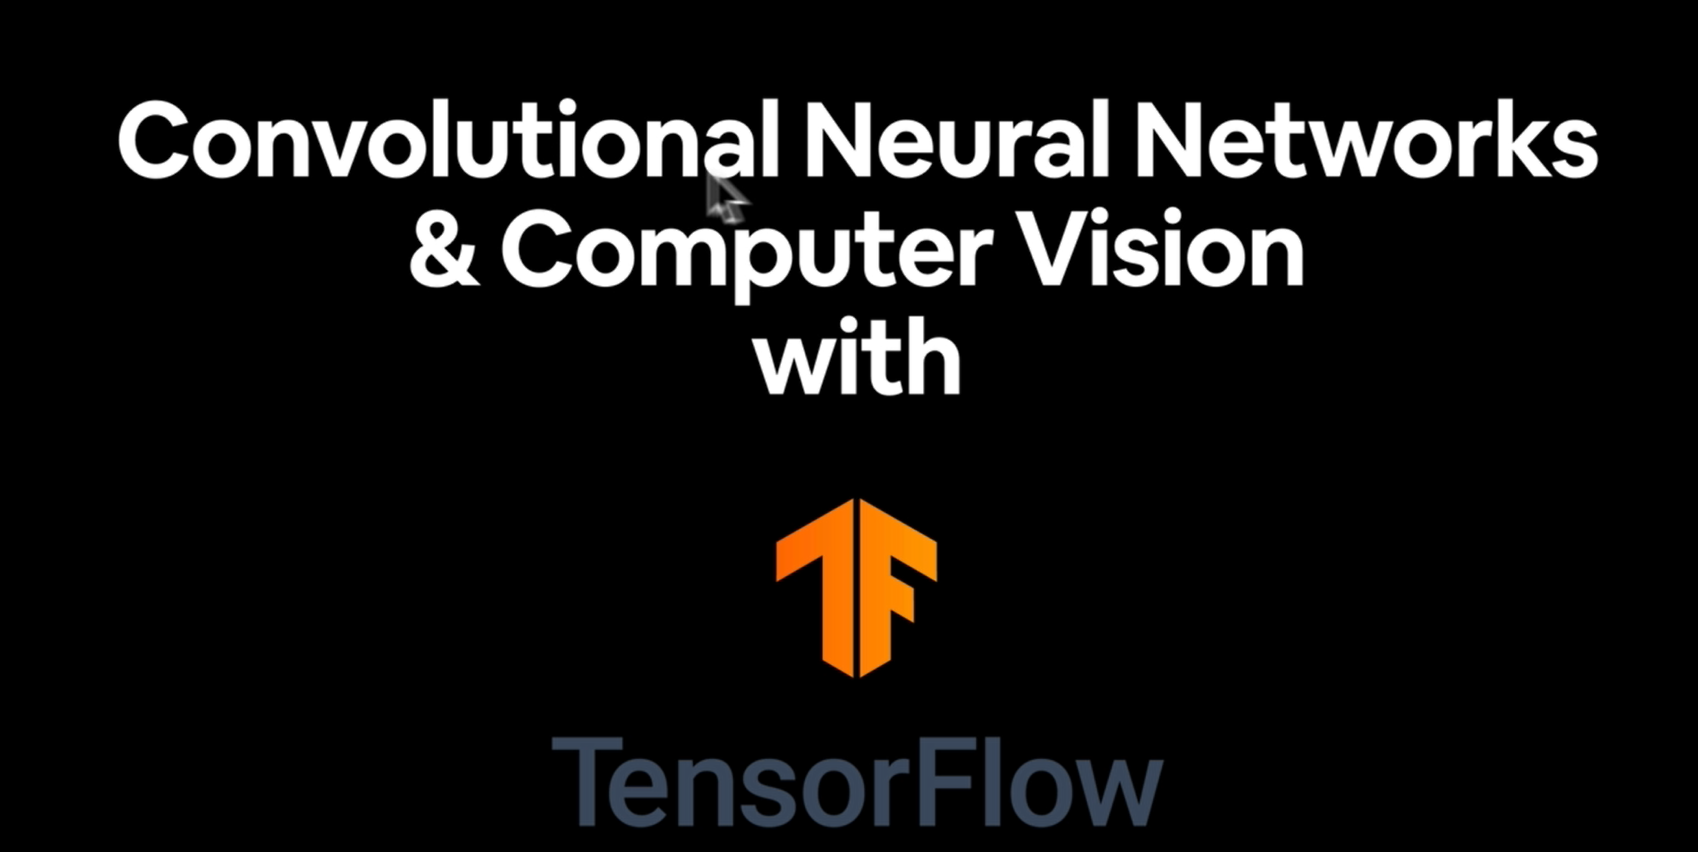

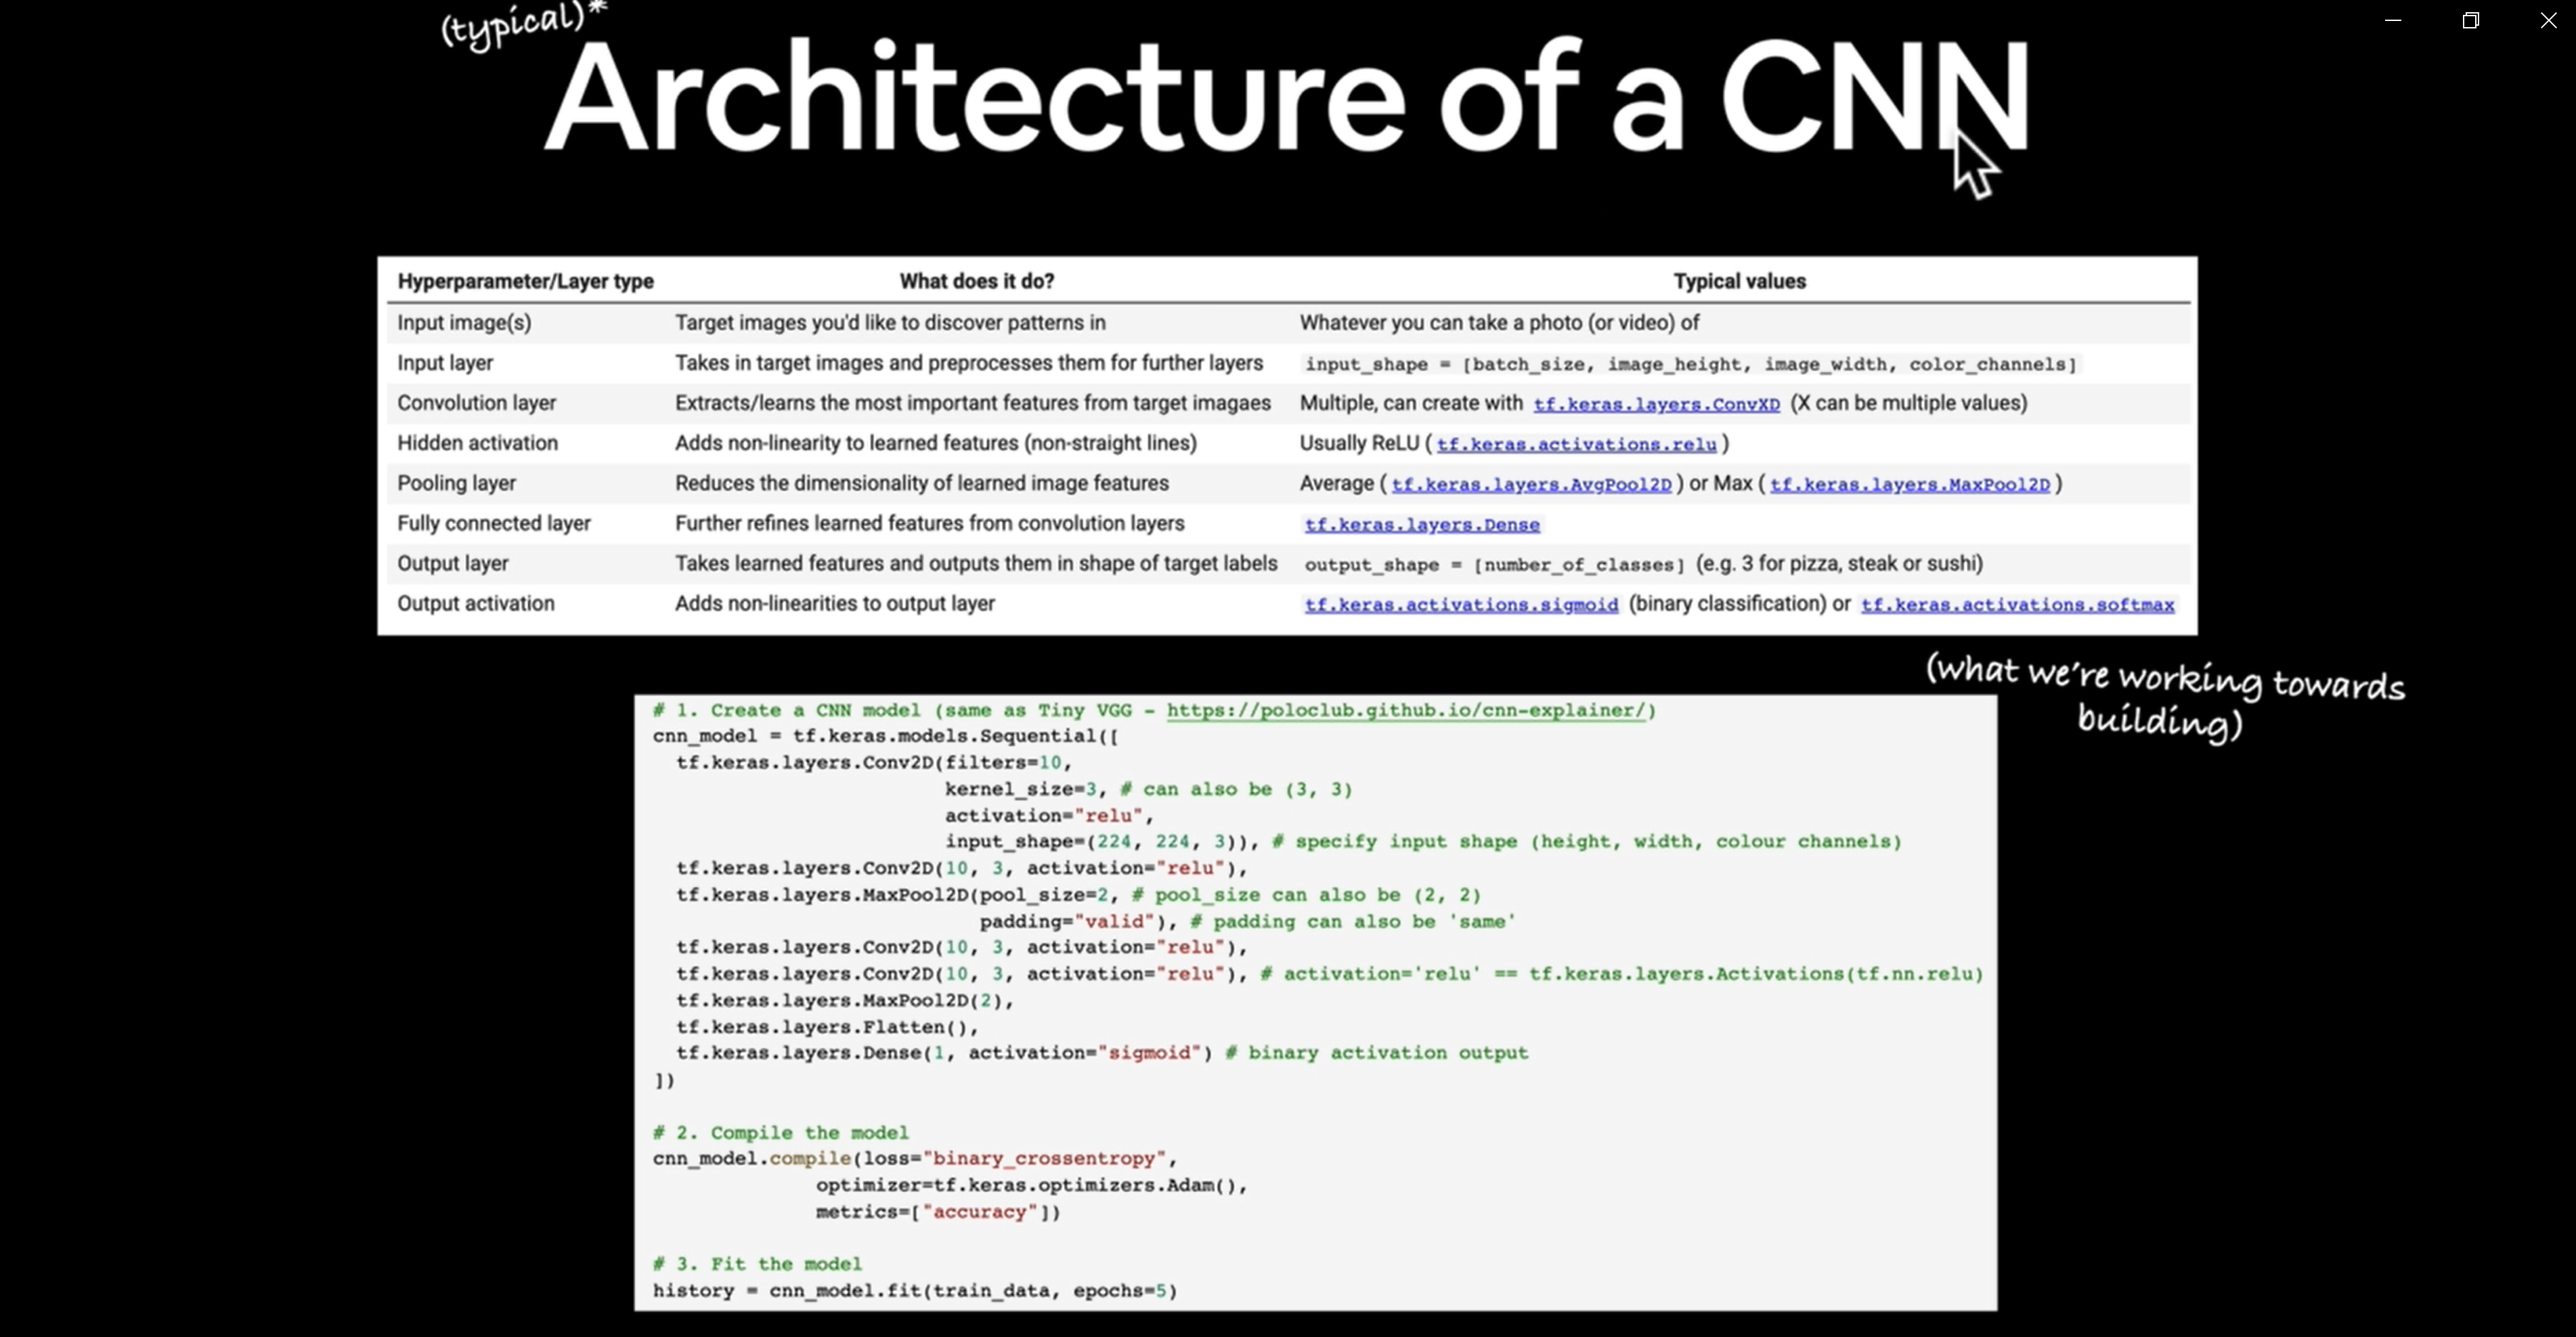

## Introduction to convolution Neural networks and computer vision with tensrflow

#Get the data

In [1]:
# Get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-08-08 21:23:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   204MB/s    in 0.5s    

2022-08-08 21:23:39 (204 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# Inspect the data

In [3]:
import os

for dirpath , dirnames,filenames in os.walk("pizza_steak"):
  print({f"there are {len(dirnames)} directories and {len(filenames)} in  : {dirpath}"})

{'there are 2 directories and 0 in  : pizza_steak'}
{'there are 2 directories and 0 in  : pizza_steak/test'}
{'there are 0 directories and 250 in  : pizza_steak/test/pizza'}
{'there are 0 directories and 250 in  : pizza_steak/test/steak'}
{'there are 2 directories and 0 in  : pizza_steak/train'}
{'there are 0 directories and 750 in  : pizza_steak/train/pizza'}
{'there are 0 directories and 750 in  : pizza_steak/train/steak'}


In [4]:
!ls la pizza_steak

ls: cannot access 'la': No such file or directory
pizza_steak:
test  train


In [5]:
# Anothor way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

## To visualize our images, first let's get the class names programmatically 

In [6]:
# Get the class name programmatically

import pathlib 
import numpy as np
data_dir  = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))# Create a list of class name

print(class_names)


['pizza' 'steak']


In [7]:
# Let's visualize our img

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image (target_dir , target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}")
  return img

['2222018.jpg']
Image shape : (512, 512, 3)


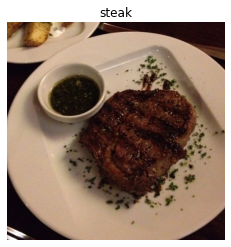

In [8]:
# steak
img = view_random_image(target_dir = "pizza_steak/train/",target_class ="steak" )

['2126352.jpg']
Image shape : (512, 512, 3)


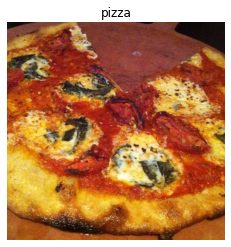

In [9]:
# pizza
img = view_random_image(target_dir = "pizza_steak/train/",target_class ="pizza" )


In [10]:
# View the image shape

img.shape # returns width , height ,colour channels


(512, 512, 3)

In [11]:
# Get all the pixel values between 0 and 1

img/255.0

array([[[0.05098039, 0.09019608, 0.09411765],
        [0.05098039, 0.09019608, 0.09411765],
        [0.05098039, 0.09019608, 0.09411765],
        ...,
        [0.07843137, 0.05098039, 0.02745098],
        [0.07843137, 0.04313725, 0.02352941],
        [0.08235294, 0.04705882, 0.02745098]],

       [[0.05882353, 0.09803922, 0.09411765],
        [0.05882353, 0.09411765, 0.09019608],
        [0.05490196, 0.08627451, 0.09411765],
        ...,
        [0.09019608, 0.0627451 , 0.03921569],
        [0.08235294, 0.05490196, 0.03137255],
        [0.08627451, 0.05098039, 0.03137255]],

       [[0.07058824, 0.09411765, 0.09411765],
        [0.06666667, 0.09019608, 0.09019608],
        [0.05882353, 0.08235294, 0.08235294],
        ...,
        [0.10588235, 0.07843137, 0.05490196],
        [0.09803922, 0.07058824, 0.04705882],
        [0.10196078, 0.06666667, 0.04705882]],

       ...,

       [[0.57647059, 0.30196078, 0.07058824],
        [0.58039216, 0.30980392, 0.08627451],
        [0.61568627, 0

# An end-to-end example

Let's bouild a neural network :


In [12]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the random_seed

tf.random.set_seed(42)

# preprocess data

train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)
# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"
# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory = train_dir , batch_size = 32,target_size = (224,224),class_mode = "binary",seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir , batch_size = 32,target_size = (224,224),class_mode = "binary",seed = 42)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Build a CNN model

model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters = 10 , kernel_size=3,activation = "relu",input_shape = (224,224,3)),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size = 2,padding = "valid"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation = "sigmoid")
])

# Copile our cnn

model_1.compile(loss = "binary_crossentropy",optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# Fit the model

history_1 = model_1.fit(train_data,epochs = 5 , steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 24s 213ms/step - loss: 0.5732 - accuracy: 0.6873 - val_loss: 0.4530 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4302 - accuracy: 0.8113 - val_loss: 0.3340 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3980 - accuracy: 0.8287 - val_loss: 0.3313 - val_accuracy: 0.8880
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3658 - accuracy: 0.8480 - val_loss: 0.3274 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3531 - accuracy: 0.8413 - val_loss: 0.2839 - val_accuracy: 0.8700


In [14]:
# get a model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

##Using the same model as before

In [15]:
# Set the random seed

tf.random.set_seed(42)

#Create a model to replicate the tensorflow Playground model

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4,activation = "relu"),
                               tf.keras.layers.Dense(4,activation = "relu"),
                               tf.keras.layers.Dense(1,activation = "sigmoid")
])

# compile the model

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"]
                )
# fit the model 
history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                validation_data=valid_data,
                validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.7335 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 182ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters then ou CNN , let's try to improve it

In [17]:
# set_the random seed
tf.random.set_seed(42)
#Create a model to replicate the tensorflow Playground model

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100,activation = "relu"),
                               tf.keras.layers.Dense(100,activation = "relu"),
                               tf.keras.layers.Dense(100,activation = "relu"),
                               tf.keras.layers.Dense(1,activation = "sigmoid")
])

# compile the model

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"]
                )
# fit the model 
history_3 = model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                validation_data=valid_data,
                validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 2.9651 - accuracy: 0.6020 - val_loss: 1.1656 - val_accuracy: 0.6160
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.7159 - accuracy: 0.7247 - val_loss: 0.4795 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6034 - accuracy: 0.7327 - val_loss: 0.4692 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6867 - accuracy: 0.7307 - val_loss: 0.9223 - val_accuracy: 0.6960
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.5618 - accuracy: 0.7600 - val_loss: 0.8222 - val_accuracy: 0.6640


In [18]:
# get a summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


##Binary classification : let's break in down
1.Become one with the data
2. Preprocess the data 
3.created a model
4. fit the model
5. evaluate the model
6.Adjust different parametres and improve the model
7. Repeat until satisfied

#.Become one with the data

['3346787.jpg']
Image shape : (512, 512, 3)
['596494.jpg']
Image shape : (512, 512, 3)


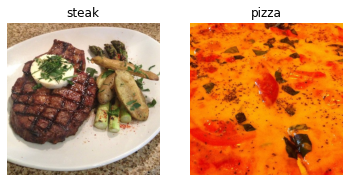

In [19]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

#2.Preprocess the data


In [20]:
# Define directory dataset paths

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

## Turn our data into ** Batches **

# Create train and test data generator and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)



In [21]:
# Load in our image data 

train_data = train_datagen.flow_from_directory(directory = train_dir,target_size =(224,224),class_mode = "binary",batch_size = 32 )
test_data = test_datagen.flow_from_directory(directory = test_dir,target_size = (224,224),class_mode = "binary",batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# Get a sample of a train data batch

images , labels = train_data.next()
len(images),len(labels)

(32, 32)

In [23]:
# How many batches are there?
len(train_data)

47

In [24]:
# Get the first two images

images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [25]:
# View the first batch of labels

labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

#3. Create a model

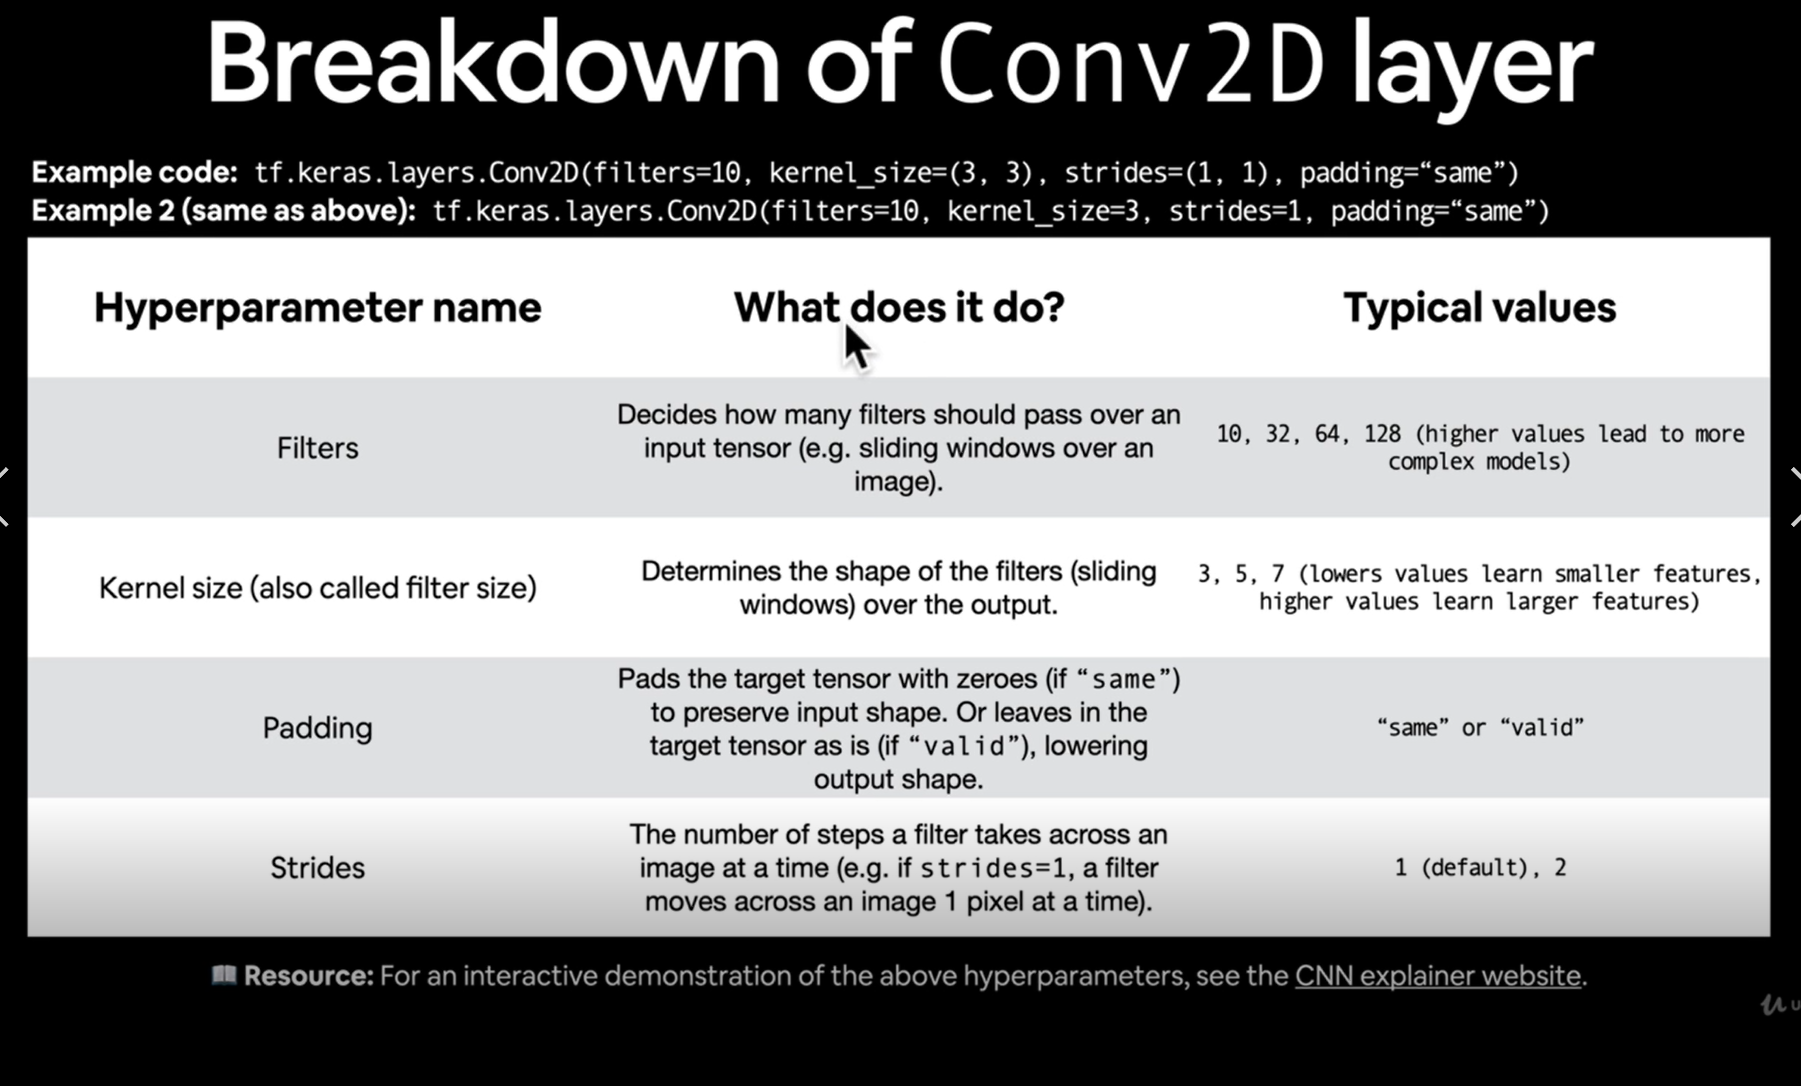

In [26]:
# Ler's make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation

from tensorflow.keras import Sequential



In [27]:
# Create the model 

model_4 = Sequential([Conv2D(filters = 10,kernel_size = 1,strides = 1,padding="valid",activation = "relu",input_shape = (224,224,3)),
                      Conv2D(10,3,activation = "relu"),
                      Flatten(),
                      Dense(1,activation="sigmoid")])
# Compile the model

model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])



In [28]:
#  Get the summary


model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      40        
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 492840)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 492841    
                                                                 
Total params: 493,791
Trainable params: 493,791
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [29]:
# Check the lenths of training and test data generators

len(train_data) , len(test_data)

(47, 16)

In [30]:
# Fit the model

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                      )

Epoch 1/5
47/47 [==============================] - 11s 207ms/step - loss: 2.1106 - accuracy: 0.6120 - val_loss: 0.5931 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4835 - accuracy: 0.7940 - val_loss: 0.4420 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3712 - accuracy: 0.8380 - val_loss: 0.3709 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.2716 - accuracy: 0.9033 - val_loss: 0.3709 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.2010 - accuracy: 0.9387 - val_loss: 0.3949 - val_accuracy: 0.8440


# 5. evaluate our model

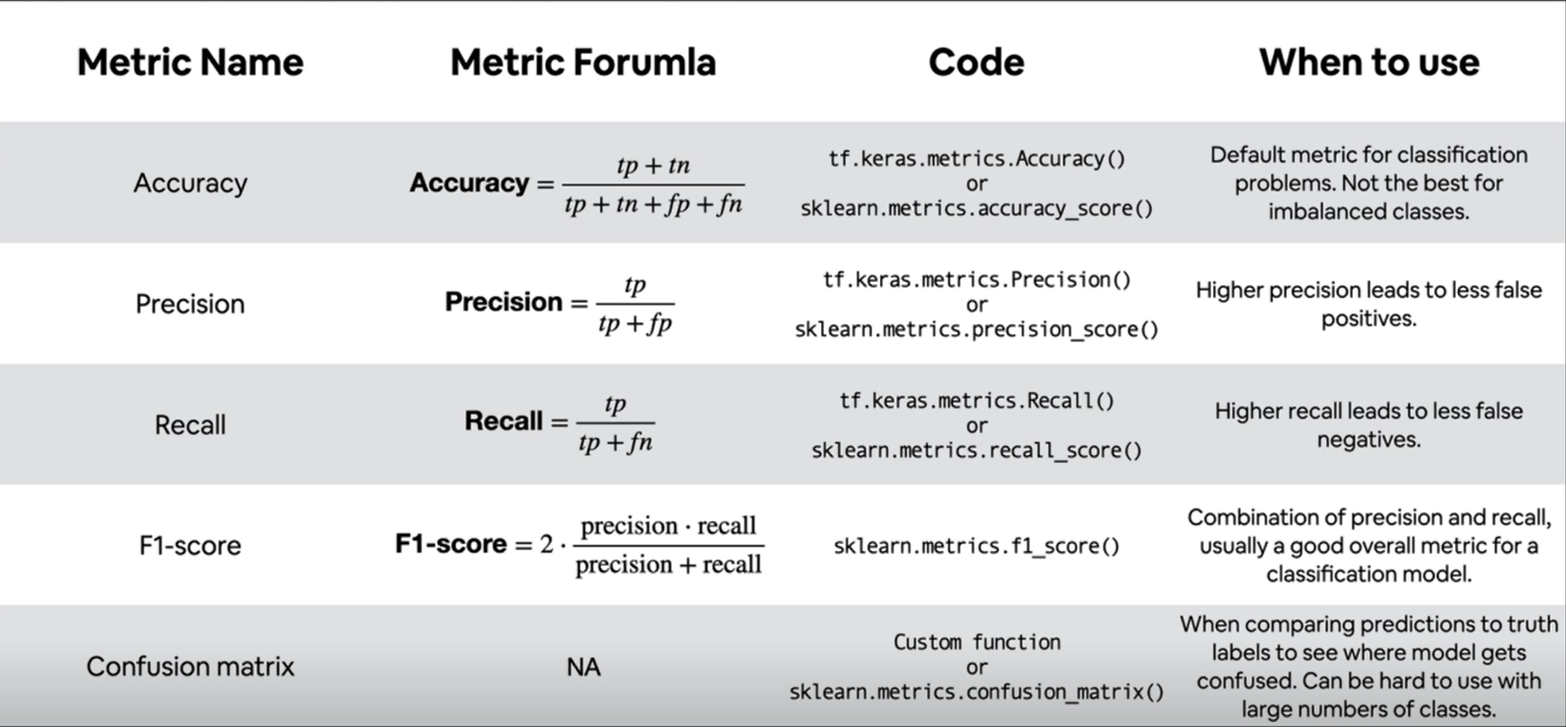

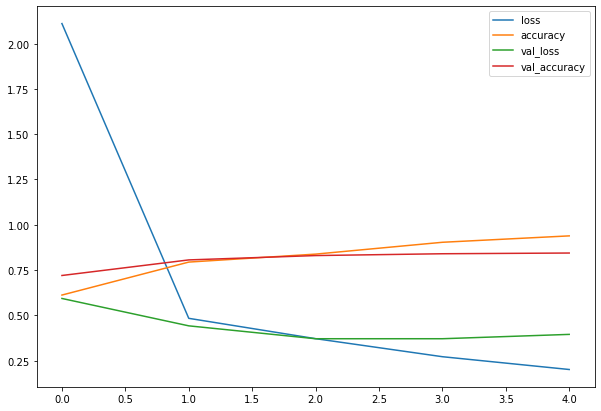

In [31]:
#Plot thr traimimg curve 

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [32]:
# Plot the the validation and training curves separately

def Plot_loss_curves(history):
  """Returns separate loss curves for training and validation metrics."""

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot the accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


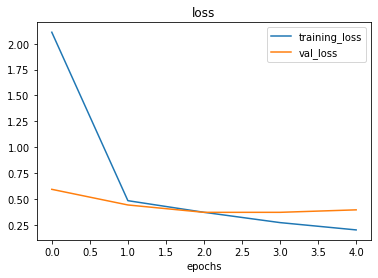

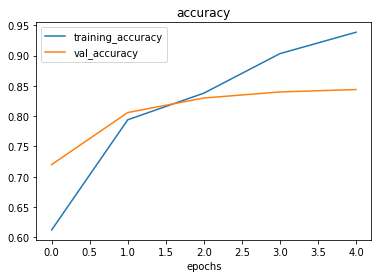

In [33]:
# check out the loss and accuracy

Plot_loss_curves(history_4)

**Note :**  When a model's validation loss starts to increase , it's likely that the model is **Overfitting** the training dataset.

# 6. Adjust the model parameters

0. Create a baseline
1. Beat the beseline by overfitting a larger model
2. Reduce overfitting

Ways the number of conv layers
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flatten layer

Reduce overfitting:

* Add dataaugmentation
* Add regularization
* Add more data..



In [34]:
# Create the model (this is going to be our new beseline )

model_5 = Sequential([
                      Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation="sigmoid")

])



In [35]:
# Compile the model

model_5.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [36]:
history_5 = model_5.fit(train_data,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 0.6162 - accuracy: 0.6713 - val_loss: 0.4751 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4889 - accuracy: 0.7767 - val_loss: 0.3904 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4443 - accuracy: 0.7953 - val_loss: 0.3806 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4149 - accuracy: 0.8207 - val_loss: 0.3725 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3977 - accuracy: 0.8340 - val_loss: 0.3419 - val_accuracy: 0.8540


In [37]:
# Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

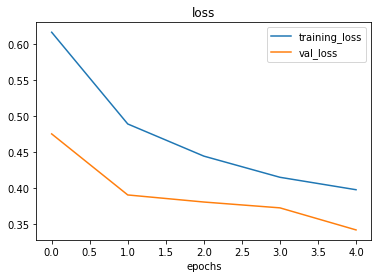

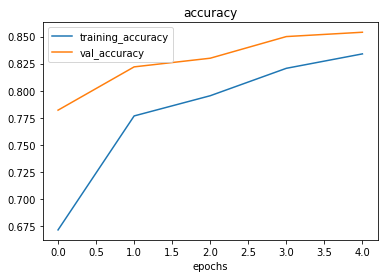

In [38]:
# plot loss curve

Plot_loss_curves(history_5)

**Note :** reducing overfitting is also known as **Regularization**

## Opening our bag of triks and finding data augmentation

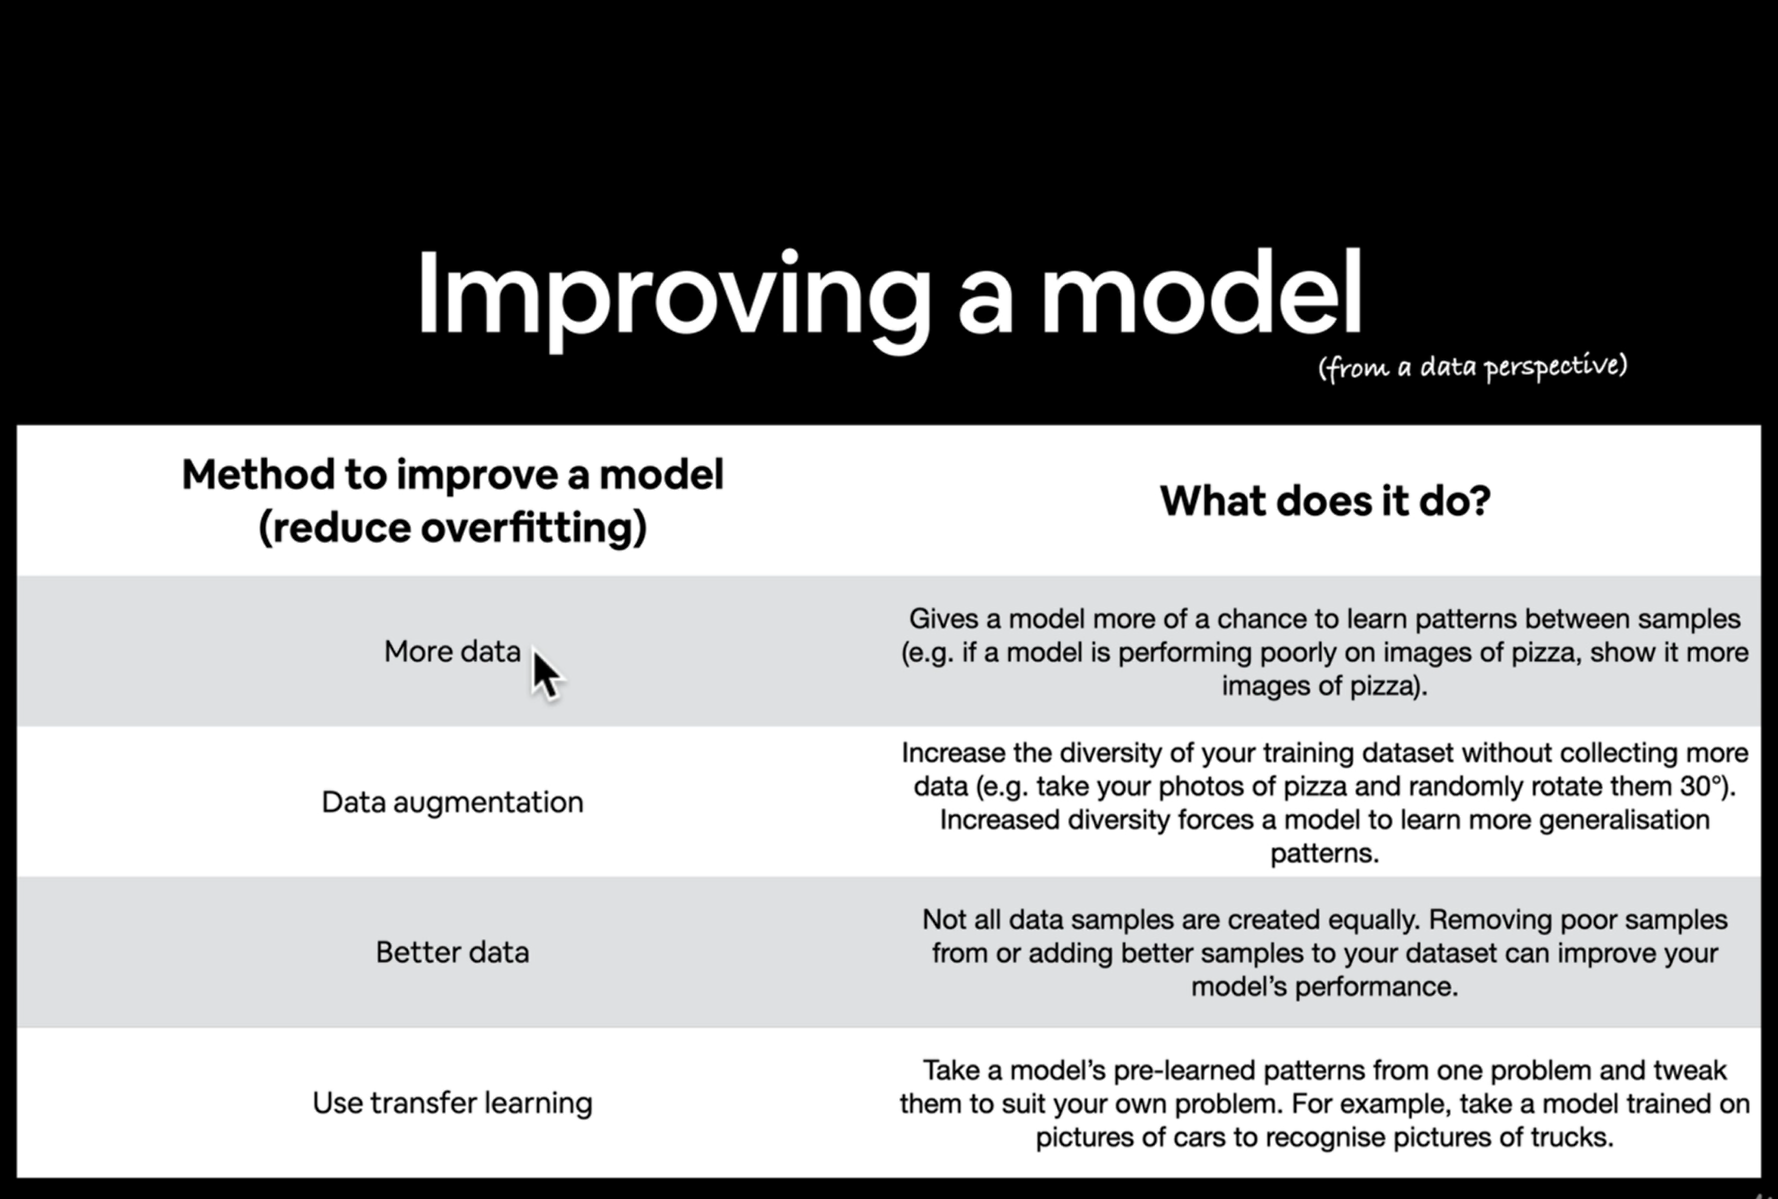

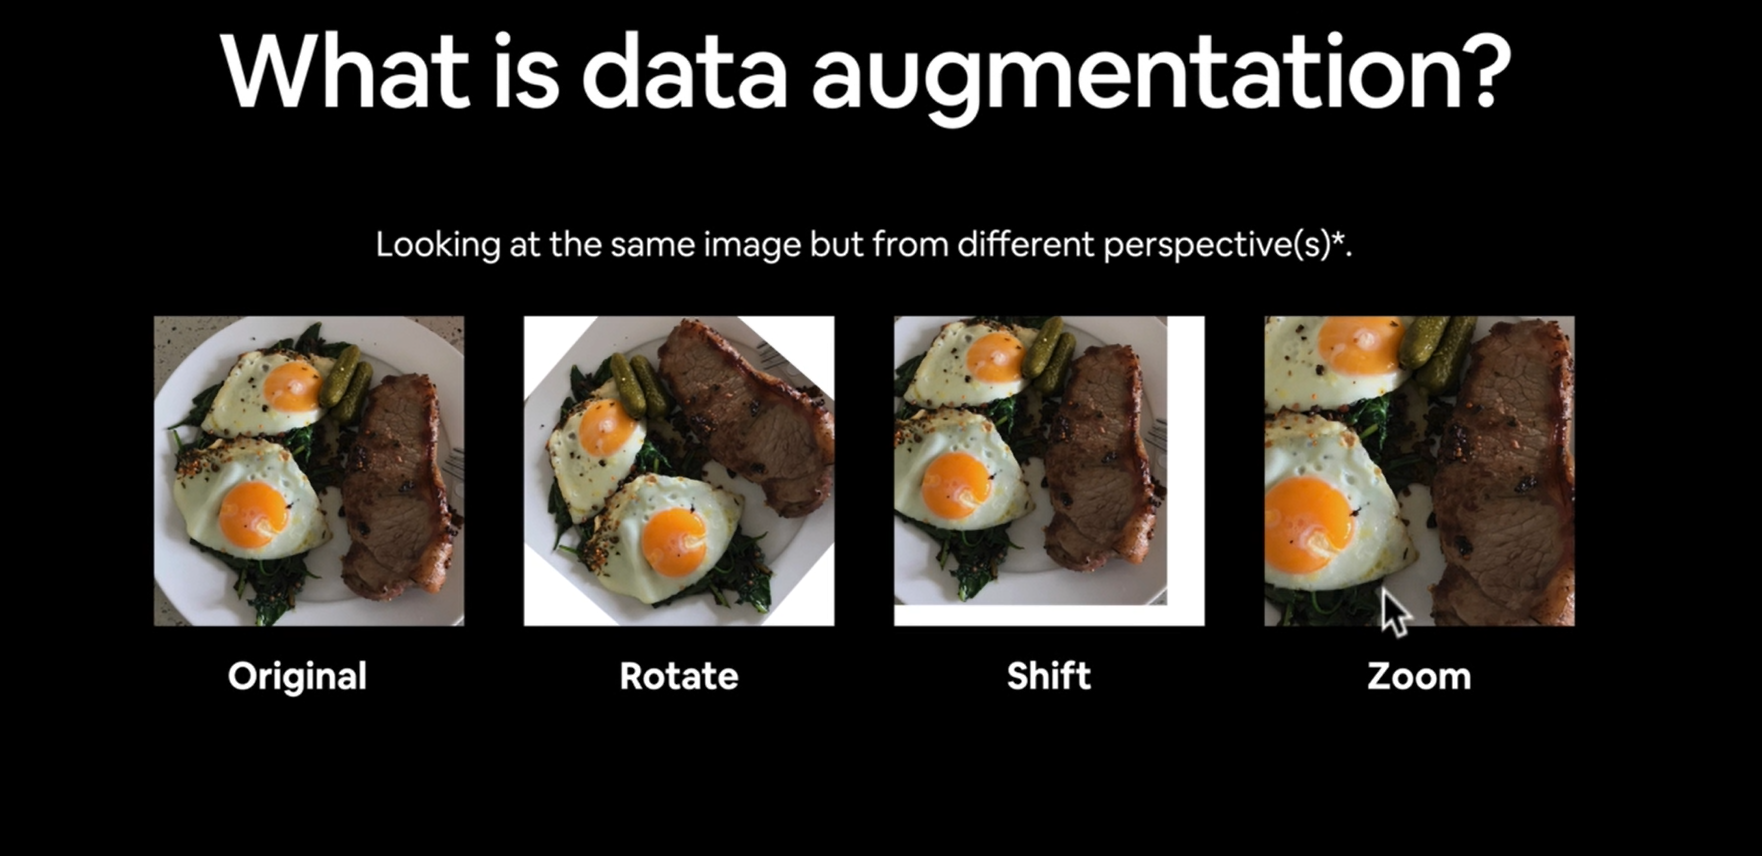

In [43]:
# Create ImageDataGnerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

# Create ImageDataGenerator without data augmentation

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [45]:
# Import data and augment it from training directory
print("Augmenred training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False) # for demonstration purpose only
# Create non_augmented data batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)
# Create non -aumented test data battches

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary",
                                             shuffle = False)



Augmenred training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [46]:
# Get sample data batches

images , labels = train_data.next()

augmented_images , augmented_labels = train_data_augmented.next()

shwing images number : 5 


(-0.5, 223.5, 223.5, -0.5)

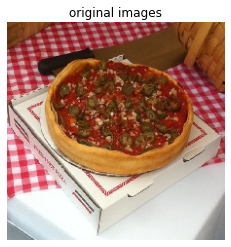

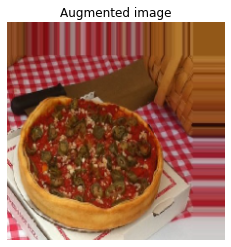

In [51]:
# Show original image and augmnd image

import random
random_number = random.randint(0,32)
print(f"shwing images number : {random_number} ")
plt.imshow(images[random_number])
plt.title(f"original images")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


In [52]:
#video 21